<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-toro-sal/blob/main/Copy_of_Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juan Felipe Toro Salgado -- Matricula: A01794247

## Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [1]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']


In [4]:
len(X)

1000

In [5]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

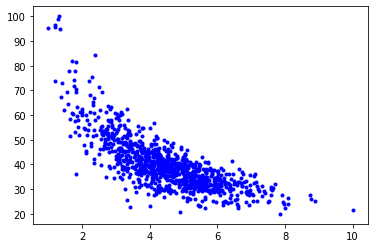

In [6]:
plt.plot(X,y,'b.')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


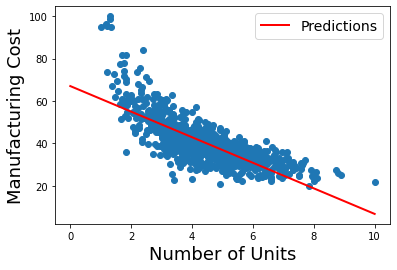

In [7]:
#lineal

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)
X_fit = np.linspace(0, 10, 1000)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y,)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("Number of Units", fontsize=18)
plt.ylabel("Manufacturing Cost", fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [8]:
linear_reg.coef_, linear_reg.intercept_

(array([-6.0333683]), 67.03904193389238)

The model estimates:

$\hat{y} = -6.03X + 67.03$

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_fit))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_fit))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_fit))

Error medio Absoluto (MAE): 10.504752129032637
Mean squared error: 157.10
Coefficient of determination: -0.40


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


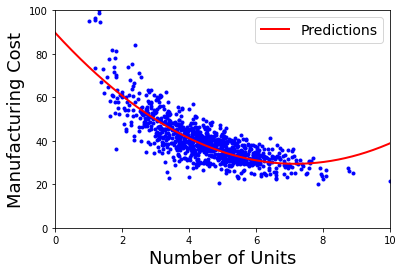

In [10]:
# polinomial
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_
X_new=np.linspace(0, 11, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("Number of Units", fontsize=18)
plt.ylabel("Manufacturing Cost", fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [11]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([-16.82425278,   1.17336718]), 89.73719677939121)

The model estimates:

$\hat{y} =  -16.82X +1.17X^2 + 89.73$

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_new))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_new))

Error medio Absoluto (MAE): 9.549153347929972
Mean squared error: 154.20
Coefficient of determination: -0.37


# Ridge

In [ ]:
# Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
scaler = StandardScaler() 
X_poly_scaled = scaler.fit(X_poly) 

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

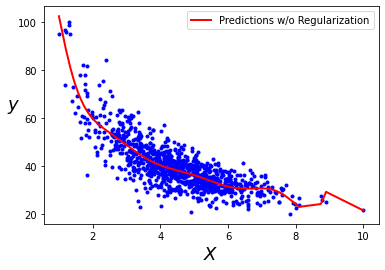

In [ ]:
y_pred = model.predict(X)

plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.001, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge',
                 Ridge(alpha=0.001, random_state=42, solver='cholesky'))])

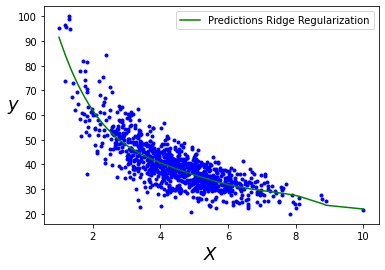

In [ ]:
y_pred = model_ridge.predict(X)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [ ]:
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.4137147922612945
Mean squared error: 34.11
Coefficient of determination: 0.70


# Lasso

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.001, random_state = 42))])
model_lasso.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+04, tolerance: 1.121e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001, random_state=42))])

In [ ]:
y_pred1 = model_lasso.predict(X)

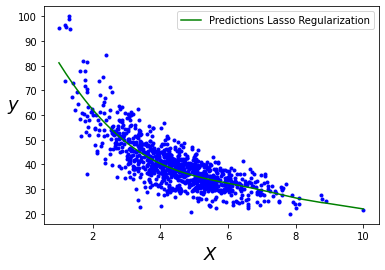

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred1, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [ ]:
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred1))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred1))

Error medio Absoluto (MAE): 4.450672471278618
Mean squared error: 35.06
Coefficient of determination: 0.69


Text(0, 0.5, 'Errors')

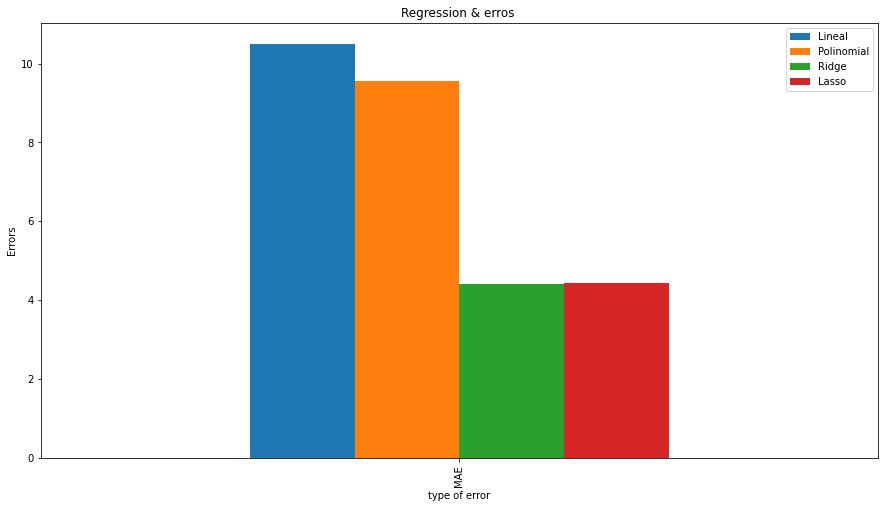

In [30]:
import pandas as pd

plotdata = pd.DataFrame({

    "Lineal":[10.5],

    "Polinomial":[9.549153347929972],

    "Ridge":[4.41],

    "Lasso":[4.45] },



    index=["MAE"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Regression & erros ")

plt.xlabel("type of error")

plt.ylabel("Errors")

Text(0, 0.5, 'Errors')

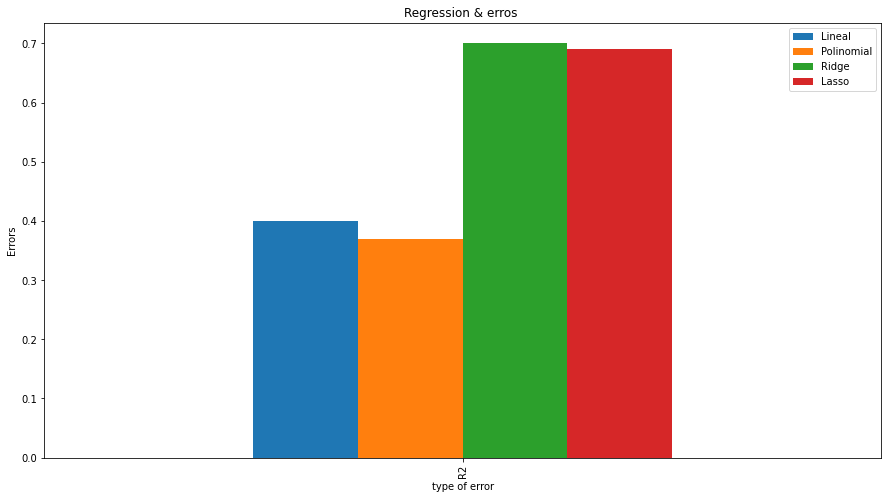

In [31]:
import pandas as pd

plotdata = pd.DataFrame({

    "Lineal":[0.4],

    "Polinomial":[0.37],

    "Ridge":[0.7],

    "Lasso":[0.69] },



    index=["R2"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Regression & erros ")

plt.xlabel("type of error")

plt.ylabel("Errors")

# Explicacion de  resultados

Segun los resultados optenidos por el analisisla regrecion que mas se acomoda al modelo es la de ridge debido a que maneja  el R2 mas cercano a 1 y el MAE mas bajo 

##Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8043,4027701265,20150501T000000,480000.0,3,1.75,2920,21375,1.0,0,0,...,8,1850,1070,1961,0,98028,47.7666,-122.265,1540,8482
4954,8078700020,20140603T000000,474900.0,3,2.25,1800,43647,1.0,0,0,...,8,1800,0,1976,0,98072,47.7757,-122.132,2480,25608
4547,7224500300,20150325T000000,221000.0,3,1.00,1240,5250,1.5,0,0,...,6,1240,0,1904,0,98055,47.4917,-122.206,1240,5250
3525,2426039313,20150218T000000,277500.0,2,1.50,1190,1236,3.0,0,0,...,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756
11825,5616000030,20141023T000000,335000.0,4,2.50,1980,4745,2.0,0,0,...,7,1980,0,2004,0,98038,47.3495,-122.040,1980,4878
2698,7942601200,20141001T000000,412000.0,2,1.00,1040,5120,1.0,0,0,...,7,1040,0,1901,0,98122,47.6048,-122.312,1250,4000
5569,6338000014,20141013T000000,625000.0,4,2.00,1760,5307,1.5,0,0,...,7,1170,590,1948,0,98105,47.6714,-122.280,1850,6600
9540,9550203690,20141120T000000,961000.0,5,2.75,2590,6120,2.0,0,0,...,8,2590,0,1909,0,98105,47.6667,-122.327,1390,3060
21035,7853370620,20150206T000000,605000.0,5,4.00,3040,6000,2.0,0,0,...,8,2280,760,2011,0,98065,47.5189,-121.876,3070,5558
7930,5419800220,20140610T000000,250000.0,3,1.75,1590,7560,1.0,0,0,...,7,1130,460,1984,0,98031,47.4016,-122.180,1500,7560


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [34]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


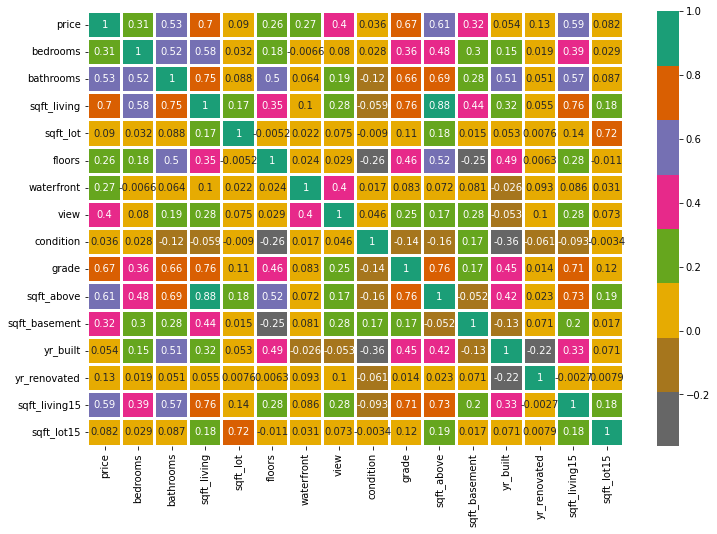

In [36]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [37]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


# Multiple linear regression

In [39]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)




LinearRegression()

In [40]:
print("Intercept: ", linreg.intercept_)
print("Coefficients:")
list(zip(X, linreg.coef_))

Intercept:  [6151359.2627409]
Coefficients:


[('bedrooms',
  array([-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,  1.71356997e-02,
          3.16916913e+04,  5.52691023e+05,  4.12493228e+04,  2.12221443e+04,
          1.19493216e+05,  4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]))]

In [41]:
y_pred=linreg.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [[497229.46928379]
 [562952.6540355 ]
 [463759.36017187]
 ...
 [401245.25396963]
 [301687.78726906]
 [635653.16972738]]


In [44]:
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Mean squared error: 53885900364.49
Coefficient of determination: 0.66


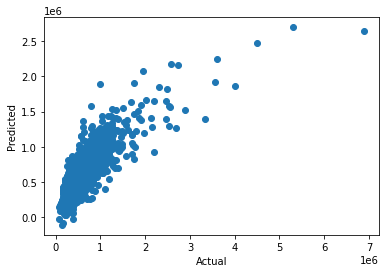

In [45]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

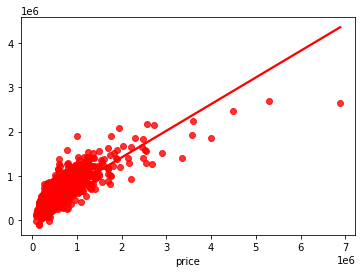

In [46]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Regresion multiple polinomial


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
model = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("linear_reg", LinearRegression())])
model.fit(X, y)
ypredict=model.predict(X_test)

#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, ypredict))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ypredict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, ypredict))

Error medio Absoluto (MAE): 110183.11725356722
Mean squared error: 25620820653.69
Coefficient of determination: 0.84


#Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.001, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X, y)
y_pred2 = model_ridge.predict(X_test)

In [ ]:
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred2))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred2))


Error medio Absoluto (MAE): 110369.81524134995
Mean squared error: 25371242273.28
Coefficient of determination: 0.84


# Lasso

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.001, random_state = 42))])
model_lasso.fit(X, y)
y_pred3 = model_lasso.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.272e+14, tolerance: 2.913e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#MAE
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred3))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred3))

Error medio Absoluto (MAE): 114499.0857393535
Mean squared error: 28033402287.47
Coefficient of determination: 0.82


Text(0, 0.5, 'Errors')

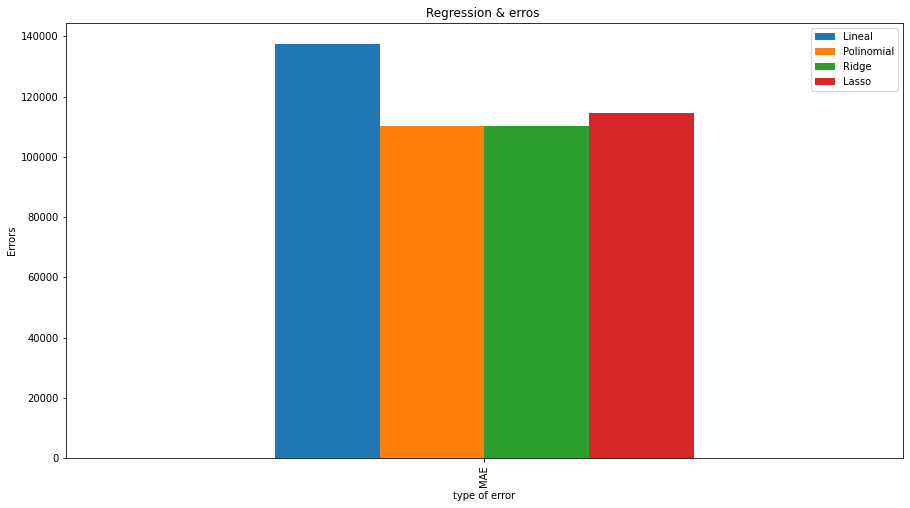

In [48]:
import pandas as pd

plotdata = pd.DataFrame({

    "Lineal":[137480.13],

    "Polinomial":[110183.1],

    "Ridge":[110369.8],

    "Lasso":[114499.08] },



    index=["MAE"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Regression & erros ")

plt.xlabel("type of error")

plt.ylabel("Errors")

Text(0, 0.5, 'Errors')

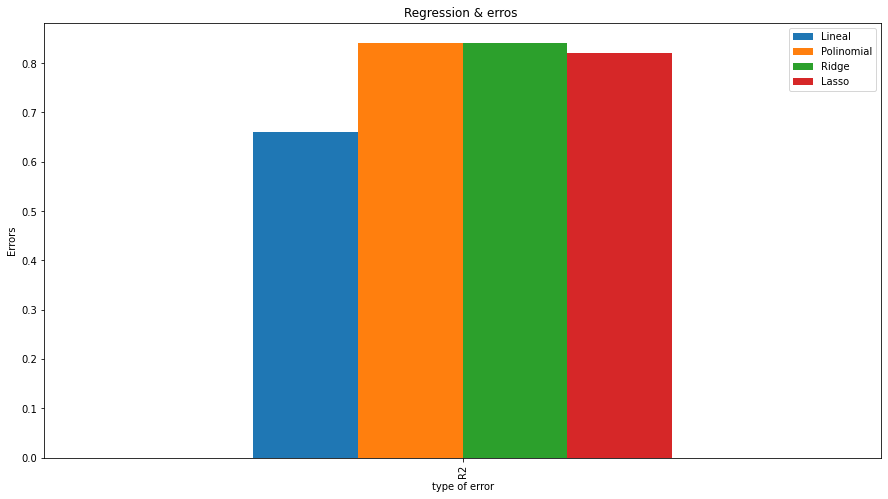

In [49]:
import pandas as pd

plotdata = pd.DataFrame({

    "Lineal":[0.66],

    "Polinomial":[0.84],

    "Ridge":[0.84],

    "Lasso":[0.82] },



    index=["R2"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Regression & erros ")

plt.xlabel("type of error")

plt.ylabel("Errors")

# Explicacion de  resultados

Segun los resultados optenidos por el analisisla regrecion que mas se acomoda al modelo es la de polinomial  debido a que maneja  el R2 mas cercano a 1 y el MAE mas bajo.

# KMEANS

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [58]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [64]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [60]:

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [65]:
latlong=df[["latitude","longitude"]]


¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

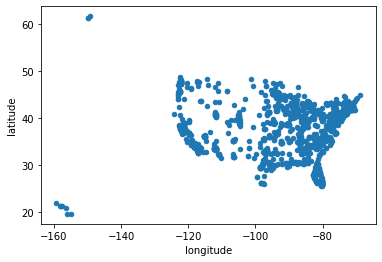

In [66]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [67]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [69]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [70]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [71]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [72]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

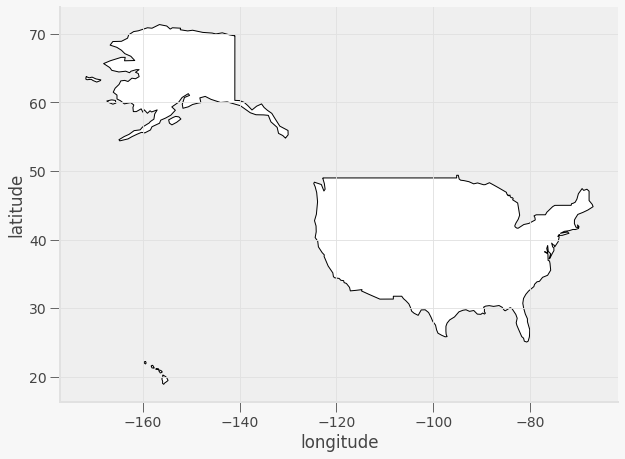

In [73]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

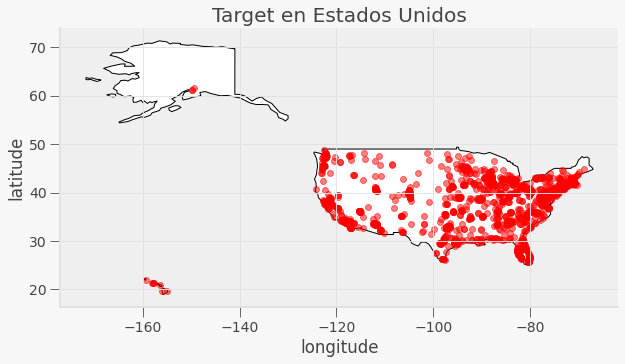

In [74]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [75]:
#tu codigo aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

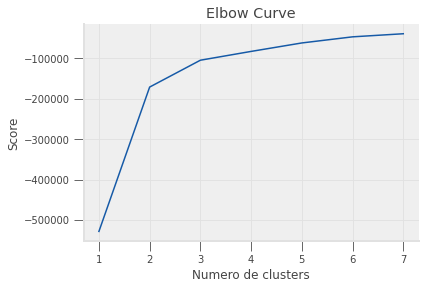

In [89]:
Nclu= range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nclu]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nclu,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [78]:
kmeans = KMeans(n_clusters=3).fit(latlong)
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['latitude', 'longitude'])
print(centroids)

    latitude   longitude
0  37.987914  -93.279950
1  37.782609  -78.534390
2  37.487342 -118.624473


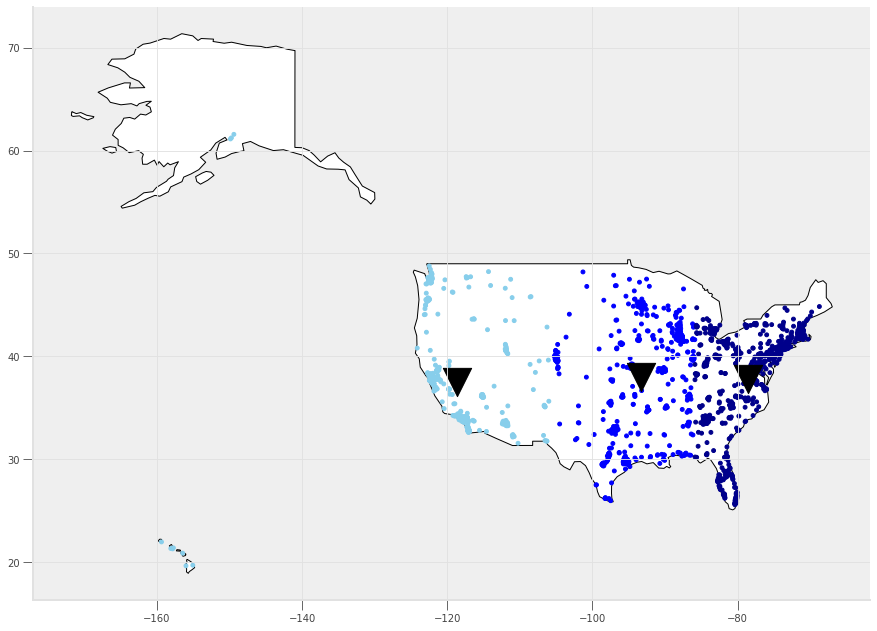

In [88]:
labels = kmeans.predict(latlong)
colores=['blue','darkblue','skyblue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig, ax= plt.subplots(figsize=(15,15))
world.query("name == 'United States of America'").plot(ax = ax, edgecolor='black', color='white') 
ax.scatter( latlong["longitude"],latlong["latitude"], c=asignar,s=15) 
ax.scatter(centroids["longitude"],centroids["latitude"], marker='v', c='black', s=800) 


# Concuciones

Los K means es una herramienta muy util para problemas  en el que toque observar distribuciones de datos  con cierto tipo de caracteristicas que permitan agrupar , asi nos facilita la visualizacion de estos para poder tomar mejores decicione. 

# Librerias
* Cartopy
Cartopy se ha diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales. Hace uso de las poderosas bibliotecas PROJ, NumPy y Shapely e incluye una interfaz  construida sobre Matplotlib para la creación de mapas con calidad de publicación
* GeoPandas es una de las más completas librerías de Python para GIS. De código abierto, nos permite trabajar con datos vectoriales. Como su nombre indica, extiende la popular librería de ciencia de datos pandas, al agregar soporte para datos geoespaciales.
* PySAL es una librería de Python que nos da la posibilidad de la realizar distintos tipos de análisis espacial, así como realizar ciencia de datos espaciales.
